In [ ]:
# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Libraries for Classification and building Models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Project Specific Libraries

import os
import librosa
import librosa.display
import glob 
import skimage

In [ ]:
# Drive Connection
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 Ben   Classroom   Course   ML-MODELS  'My Drive'   Staj   Tez


In [ ]:
!tar -xvf "/mydrive/Course/final_project/8hY5ER.tar.gz"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
UrbanSound8K/audio/fold4/17480-2-0-6.wav
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fol

In [ ]:
## Analysing CSV Data
df = pd.read_csv("/content/UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
# Using Librosa to analyse random sound sample - SPECTOGRAM
dat1, sampling_rate1 = librosa.load('/content/UrbanSound8K/audio/fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('/content/UrbanSound8K/audio/fold5/100263-2-0-117.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

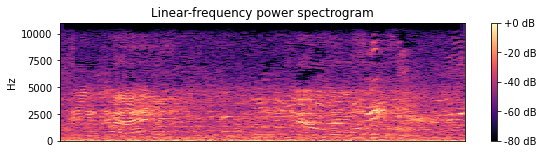

In [ ]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

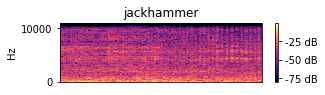

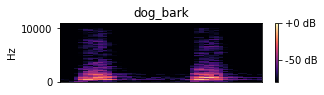

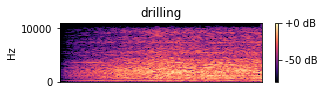

In [ ]:
#Using random samples to observe difference in waveforms.

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = '/content/UrbanSound8K/audio/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

# Feature Extraction and Database Building

In [ ]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = '/content/UrbanSound8K/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [ ]:
temp = parser(df)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


In [ ]:
temp = np.array(temp)
data = temp.transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [ ]:
for i in range(8732):
    X[i] = (X_[i])

In [ ]:
Y = to_categorical(Y)

In [ ]:
'''Final Data'''
print(X)
print(Y)

[[2.69767806e-05 2.21952942e-04 2.99830193e-04 ... 2.18745772e-04
  4.35239554e-06 1.53221535e-07]
 [4.96997461e-02 4.95272391e-02 3.71718816e-02 ... 3.45579956e-08
  9.78166970e-09 6.45950093e-09]
 [3.08491103e-02 2.80201510e-02 3.64435948e-02 ... 1.53248472e-08
  3.88772925e-09 2.68361910e-09]
 ...
 [1.63483080e-02 6.27973080e-02 6.23526797e-02 ... 4.73086266e-06
  3.84619057e-07 1.00699680e-07]
 [2.41801087e-02 7.76229203e-02 6.35382384e-02 ... 1.66276095e-07
  3.09857455e-08 1.72939156e-08]
 [3.62155996e-02 5.45257442e-02 9.47468206e-02 ... 1.16855585e-06
  2.74766620e-07 1.92392292e-07]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

In [ ]:
input_dim = (16, 8, 1)

In [ ]:
#Model Build
model = tf.keras.Sequential()

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(input_dim)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [ ]:
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [ ]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [ ]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train,Y_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(X_test,Y_test))

Epoch 1/100
52/52 [==============================] - 2s 47ms/step - loss: 0.7013 - accuracy: 0.7746 - val_loss: 0.8834 - val_accuracy: 0.7389
Epoch 2/100
52/52 [==============================] - 2s 47ms/step - loss: 0.6552 - accuracy: 0.7934 - val_loss: 0.8925 - val_accuracy: 0.7339
Epoch 3/100
52/52 [==============================] - 2s 47ms/step - loss: 0.6768 - accuracy: 0.7929 - val_loss: 0.8620 - val_accuracy: 0.7499
Epoch 4/100
52/52 [==============================] - 3s 48ms/step - loss: 0.6363 - accuracy: 0.7998 - val_loss: 0.8649 - val_accuracy: 0.7540
Epoch 5/100
52/52 [==============================] - 2s 47ms/step - loss: 0.5789 - accuracy: 0.8204 - val_loss: 0.9684 - val_accuracy: 0.7485
Epoch 6/100
52/52 [==============================] - 2s 47ms/step - loss: 0.5986 - accuracy: 0.8140 - val_loss: 0.9298 - val_accuracy: 0.7320
Epoch 7/100
52/52 [==============================] - 2s 48ms/step - loss: 0.5913 - accuracy: 0.8108 - val_loss: 0.8700 - val_accuracy: 0.7600
Epoch 

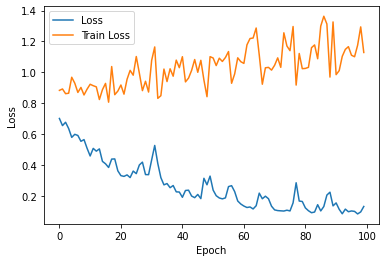

In [ ]:
# Plot the the training loss
plt.plot(results.history['loss'], label="Loss")

# Plot the the validation loss
plt.plot(results.history['val_loss'], label="Train Loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

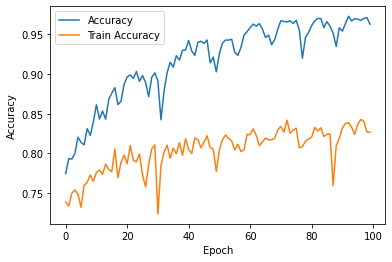

In [ ]:
# Plot the the training accuracy
plt.plot(results.history['accuracy'], label="Accuracy")

# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label="Train Accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Evaluate the performance
model.evaluate(X_test,Y_test)

69/69 [==============================] - 1s 20ms/step - loss: 1.1289 - accuracy: 0.8268


[1.1288670301437378, 0.826843798160553]

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test.reshape(2183, 16, 8, 1))

# Print the prediction result
prediction_result

array([[1.48523092e-01, 2.22570775e-03, 8.36992323e-01, ...,
        5.81898803e-06, 7.31730321e-03, 1.19144469e-03],
       [1.23220205e-01, 2.31054407e-02, 3.11311215e-01, ...,
        2.14557294e-02, 3.46179694e-01, 7.51944259e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [8.27684489e-05, 4.59921430e-04, 9.98260081e-01, ...,
        2.74352652e-09, 5.35354309e-04, 4.72408865e-05],
       [1.73132880e-11, 1.93031754e-11, 6.38941486e-08, ...,
        1.80294091e-06, 1.23900945e-10, 4.47891724e-09],
       [1.01694263e-21, 2.11913522e-13, 5.36864508e-09, ...,
        1.09312949e-26, 2.10009521e-09, 8.78162965e-09]], dtype=float32)

In [ ]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability=prediction_result.max()

In [ ]:
# Print the results
print("Image Class " + str(predicted_class) + " with " + str(predicted_probability) + " %")

Image Class 28 with 1.0 %


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 4, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 4, 64)          18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 2, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 4, 2, 64)          36928     
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 2, 64)         

In [ ]:
#Save .csv
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)
preds = np.argmax(predictions, axis = 1)
result = pd.DataFrame(preds)
result.to_csv("/mydrive/Course/final_project/UrbanSound8kResults.csv")

69/69 [==============================] - 0s 5ms/step - loss: 1.1289 - accuracy: 0.8268
[1.1288670301437378, 0.826843798160553]
